In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
n_data = 100
X = np.random.randn(100, 10)
class_percent = [0.1, 0.3, 0.6]
y = np.hstack([[i]*int(100*percent) for i, percent in enumerate(class_percent)])
groups = np.hstack([[i]*10 for i in range(10)])

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [3]:
def group_plot(classes, groups):
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)), [.5]*len(groups), c = groups, marker = '_', lw = 50, cmap = cmap_data)
    ax.scatter(range(len(groups)), [3.5]*len(groups), c = classes, marker = '_', lw = 50, cmap = cmap_data)
    ax.set(ylim = [-1, 5], yticks = [0.5, 3.5], yticklabels = ['Data\ngroup', 'Data\nclass'], xlabel = 'Data Index')

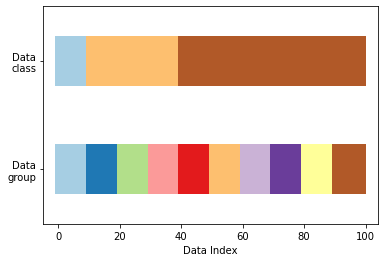

In [4]:
group_plot(y, groups)

In [5]:
def plot_cv(cv, X, y, group, ax, n_splits):
    for i, (tr, te) in enumerate(cv.split(X, y, groups = group)):
        indices = np.array([np.nan]*len(X))
        indices[tr] = 1
        indices[te] = 0
        
        ax.scatter(range(len(indices)), [i+0.5]*len(indices), c = indices, marker = '_', lw = 10, cmap = cmap_cv,
                  vmin = -0.2, vmax = 1.2)
        
    ax.scatter(range(len(X)), [i+1.5]*len(X), c = y, marker = '_', lw = 10, cmap = cmap_data)
    ax.scatter(range(len(X)), [i+2.5]*len(X), c = group, marker = '_', lw = 10, cmap = cmap_data)
    
    yticklabels = [i+1 for i in range(n_splits)] + ['class', 'group']
    ax.set(yticks = np.arange(n_splits + 2) + 0.5, yticklabels = yticklabels, xlabel = 'Data Index', ylabel = "CV Fold",
          ylim = [n_splits + 2.2, -0.2], xlim = [0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize = 15)
    
    for i in ['top', 'right', 'left']:
        ax.spines[i].set_visible(False)
        
    
    return ax

<AxesSubplot:title={'center':'KFold'}, xlabel='Data Index', ylabel='CV Fold'>

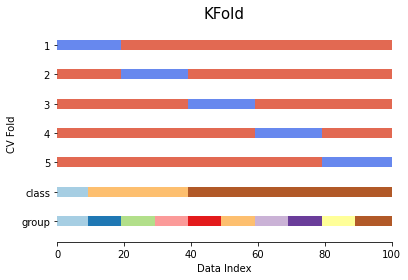

In [6]:
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, TimeSeriesSplit

fig, ax = plt.subplots()
kf = KFold(n_splits = 5)
plot_cv(kf, X, y, groups, ax, 5)

<AxesSubplot:title={'center':'StratifiedKFold'}, xlabel='Data Index', ylabel='CV Fold'>

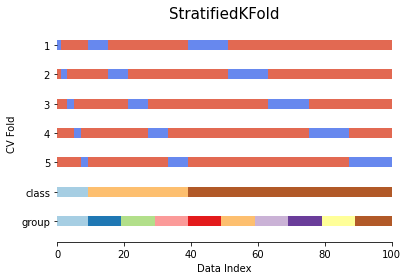

In [7]:
fig, ax = plt.subplots()
skf = StratifiedKFold(n_splits = 5)
plot_cv(skf, X, y, groups, ax, 5)

<AxesSubplot:title={'center':'GroupKFold'}, xlabel='Data Index', ylabel='CV Fold'>

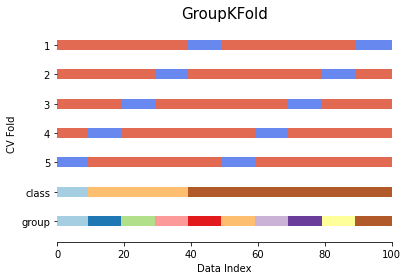

In [8]:
fig, ax = plt.subplots()
gkf = GroupKFold(n_splits = 5)
plot_cv(gkf, X, y, groups, ax, 5)

<AxesSubplot:title={'center':'TimeSeriesSplit'}, xlabel='Data Index', ylabel='CV Fold'>

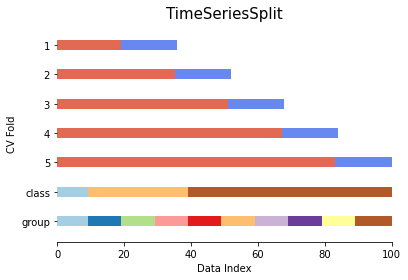

In [9]:
fig, ax = plt.subplots()
skf = TimeSeriesSplit(n_splits = 5)
plot_cv(skf, X, y, groups, ax, 5)